# Italian Financial Challenge - Starter Template

**Student Name:** [Your Name]

**Challenge:** [Choose: Bankruptcy Prediction / Financial Health Classification / Revenue Forecasting]

**Date:** [Date]

---

## Instructions

This template provides a suggested structure for your challenge solution. You can adapt it to your needs, but make sure to cover all required sections:

1. Problem Statement and Objectives
2. Data Loading and Exploration
3. Data Preprocessing
4. Feature Engineering
5. Model Development
6. Model Evaluation
7. Interpretation and Business Insights
8. Conclusions and Future Work

**Remember:**
- Document your thought process with markdown cells
- Comment your code clearly
- Create visualizations to support your insights
- Interpret results in business terms
- Check the evaluation rubric to ensure you meet all criteria

## 1. Problem Statement and Objectives

**Challenge:** [Describe which challenge you chose and why]

**Objective:** [State the prediction goal clearly]

**Success Criteria:** [Define what "good" performance looks like for your chosen challenge]

**Approach:** [Briefly outline your planned approach]

In [10]:
# ========================================
# CELL 2: Import Required Libraries
# ========================================

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Warnings control
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)  # Tüm kolonları göster
pd.set_option('display.max_rows', 100)      # Max 100 satır göster
pd.set_option('display.float_format', '{:.4f}'.format)  # 4 ondalık

# Plot settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Libraries imported successfully!")
print(f" Pandas version: {pd.__version__}")
print(f" Numpy version: {np.__version__}")

 Libraries imported successfully!
 Pandas version: 3.0.0
 Numpy version: 1.26.4


## 2. Data Loading and Exploration (Refactored EDA: Lean, Defensible, Leakage-Safe)

This section prioritizes a minimal, high-signal set of plots (8–10) with scale-aware visuals.


### 1. Dataset Overview


In [11]:
# ========================================
# CELL 3: Load Training Data
# ========================================

# File path
TRAIN_PATH = '../data/processed/train_data.csv'

# Load data
print(" Loading training data...")
train_df = pd.read_csv(TRAIN_PATH)

# Basic info
print(f" Data loaded successfully!")
print(f" Shape: {train_df.shape[0]:,} rows × {train_df.shape[1]} columns")
print(f" Memory usage: {train_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# First look
print("\n" + "="*80)
print(" FIRST 5 ROWS:")
print("="*80)
train_df.head()

 Loading training data...
 Data loaded successfully!
 Shape: 11,828 rows × 30 columns
 Memory usage: 5.28 MB

 FIRST 5 ROWS:


,company_id,fiscal_year,province,region,ateco_sector,legal_form,years_in_business,total_fixed_assets,current_assets,total_assets,shareholders_equity,total_debt,short_term_debt,long_term_debt,production_value,production_costs,operating_income,financial_income,financial_expenses,net_profit_loss,roe,roi,leverage,current_ratio,quick_ratio,debt_to_assets,profit_margin,bankruptcy_next_year,financial_health_class,revenue_change
0,COMP_00000,2018,NaN,Campania,47,SRL,32,242234260.6100,950481877.2800,1192716137.8900,372870210.9600,819845926.9300,560184200.2500,259661726.6800,1846635930.2200,1611362993.6500,235272936.5700,4886785.1200,20068071.2900,215204865.2900,0.5772,0.1973,2.1987,1.6967,1.0180,0.6874,0.1165,0,B,NaN
1,COMP_00000,2019,NaN,Campania,47,SRL,33,39836387.0900,141122561.1100,180958948.2000,57007011.2900,123951936.9200,71353454.6600,52598482.2500,428915932.6800,389603754.9600,39312177.7200,58246.0600,2537224.2000,36774953.5200,0.6451,0.2172,2.1743,1.9778,1.1867,0.6850,0.0857,0,B,-76.7700
2,COMP_00000,2020,NaN,Campania,47,SRL,34,666225046.9700,1367208082.4600,2033433129.4300,302904566.8000,1730528562.6300,990400389.0400,740128173.5900,6956196773.2200,6988488857.1400,-32292083.9200,5327332.5100,55844558.3800,-88136642.2900,-0.2910,-0.0159,5.7131,1.3805,0.8283,0.8510,-0.0127,0,D,1521.8100
3,COMP_00000,2021,NaN,Campania,47,SRL,35,46371874.1600,252422792.5200,298794666.6800,39010978.8400,259783687.8400,152767378.7800,107016309.0700,503183859.8200,504723505.0600,-1539645.2400,116335.8000,7828741.6100,-9368386.8500,-0.2401,-0.0052,6.6592,1.6523,0.9914,0.8694,-0.0186,0,D,-92.7700
4,COMP_00001,2018,CA,Sardegna,62,SRL,8,83480345.7300,132569683.5800,216050029.3000,65669366.6500,150380662.6600,75824818.7000,74555843.9500,411338021.1200,391241355.5400,20096665.5800,640538.9400,5860639.2200,14236026.3600,0.2168,0.0930,2.2900,1.7484,1.0490,0.6960,0.0346,0,B,NaN


**What this shows:** dataset scale, feature types, and explicit exclusion of leakage targets.  
**Why it matters for modeling:** establishes which columns are safe and eligible for feature engineering.


**Units and domain assumptions:**
- Monetary columns are annual values in euros.
- Ratio columns are unitless and may be negative when equity/profit is negative.
- `revenue_change` is a percent (%) derived from year-over-year production value.


Data Structure Analysis

In [12]:
# ========================================
# CELL 4: Data Structure Analysis
# ========================================

print("="*80)
print(" DATASET STRUCTURE")
print("="*80)

# Column names and types
print("\n1️ COLUMN INFORMATION:")
print("-"*80)
print(train_df.info())

print("\n" + "="*80)
print("2️ DATA TYPES SUMMARY:")
print("-"*80)
print(train_df.dtypes.value_counts())

print("\n" + "="*80)
print("3️ BASIC STATISTICS (Numeric Columns):")
print("-"*80)
train_df.describe()

 DATASET STRUCTURE

1️ COLUMN INFORMATION:
--------------------------------------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 11828 entries, 0 to 11827
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   company_id              11828 non-null  str    
 1   fiscal_year             11828 non-null  int64  
 2   province                10909 non-null  str    
 3   region                  11828 non-null  str    
 4   ateco_sector            11828 non-null  int64  
 5   legal_form              11828 non-null  str    
 6   years_in_business       11828 non-null  int64  
 7   total_fixed_assets      11828 non-null  float64
 8   current_assets          11828 non-null  float64
 9   total_assets            11828 non-null  float64
 10  shareholders_equity     11828 non-null  float64
 11  total_debt              11828 non-null  float64
 12  short_term_debt         11828 n

,fiscal_year,ateco_sector,years_in_business,total_fixed_assets,current_assets,total_assets,shareholders_equity,total_debt,short_term_debt,long_term_debt,production_value,production_costs,operating_income,financial_income,financial_expenses,net_profit_loss,roe,roi,leverage,current_ratio,quick_ratio,debt_to_assets,profit_margin,bankruptcy_next_year,revenue_change
count,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,11783.0000,11828.0000,11783.0000,11828.0000,11828.0000,11828.0000,11828.0000,11828.0000,8829.0000
mean,2019.4954,45.8277,35.1794,1029206034.6969,1438435231.5059,2467641266.2028,916314057.2517,1551327208.9511,853465556.0625,697861652.8886,3969062882.1995,3680129220.7259,288933661.4737,6418313.9654,54649803.8177,234283857.6560,0.2543,0.1233,2.1353,1.8700,1.1220,0.6332,0.0580,0.0071,453.4346
std,1.1165,16.6772,19.9081,6120958154.9073,6873106269.8855,12483054731.5484,5023563547.9297,7724478122.5394,4360359782.6521,3493369047.5660,18960964125.3638,17579113468.8199,1574126323.3427,39308317.1791,285080000.0431,1348221843.5129,0.5774,0.0910,2.1590,0.6140,0.3684,0.1149,0.0392,0.0840,4601.9206
min,2018.0000,10.0000,0.0000,1267167.2800,1278800.5000,2545967.7800,-3330561328.5400,1839790.9300,898546.0600,941244.8700,2329669.8200,1580518.0900,-2688184167.7000,62.4100,59269.4900,-4062688798.2800,-39.1771,-0.4753,0.8182,0.5510,0.3306,0.4500,-0.1497,0.0000,-99.9400
25%,2018.0000,41.0000,18.0000,73198030.2400,124447056.5800,208779321.5075,70704283.4750,129464595.5400,69256174.0400,56663618.1050,298488268.6650,273128966.6300,16986263.0175,356954.7300,4355199.9175,10491728.7275,0.1104,0.0619,1.1656,1.4308,0.8585,0.5385,0.0305,0.0000,-68.5900
50%,2019.0000,46.0000,35.0000,190599471.6350,312559707.3950,521237912.2500,181595845.9250,326415154.3900,174480152.6750,146258470.0900,804001932.6100,745942824.7950,51285903.0700,1068329.6350,11102622.5300,37987273.1200,0.2216,0.1050,1.6803,1.8117,1.0871,0.6275,0.0603,0.0000,3.0400
75%,2020.0000,56.0000,52.0000,539874121.3525,838719747.4525,1394477547.4350,502274680.2275,879508698.0550,477729823.8550,396007036.0025,2241163077.0925,2075266166.0350,153806207.6825,3178533.4275,30056984.6300,122686151.9850,0.3907,0.1709,2.4848,2.2389,1.3433,0.7138,0.0900,0.0000,238.8500
max,2021.0000,82.0000,71.0000,254871222410.0900,251254933402.3100,506126155812.4000,195614531955.1300,310511623857.2600,169968538153.7700,140543085703.5000,604436599587.3600,573646991692.9301,56219268014.6700,1640113559.9300,9311030361.9200,50118180303.7300,1.7716,0.4906,101.1538,4.5393,2.7236,1.1923,0.1200,1.0000,302126.4800


Target Variable Analysis

In [ ]:
# ========================================
# CELL 5: Target Variable Analysis
# ========================================

# Target column name
TARGET = 'revenue_change'

print("="*80)
print(f" TARGET VARIABLE: {TARGET}")
print("="*80)

# Check if exists
if TARGET in train_df.columns:
    print(" Target column found")
    
    # Basic statistics
    print("\n1️ BASIC STATISTICS:")
    print("-"*80)
    print(f"Mean:        {train_df[TARGET].mean():.4f}")
    print(f"Median:      {train_df[TARGET].median():.4f}")
    print(f"Std:         {train_df[TARGET].std():.4f}")
    print(f"Min:         {train_df[TARGET].min():.4f}")
    print(f"Max:         {train_df[TARGET].max():.4f}")
    print(f"Missing:     {train_df[TARGET].isnull().sum()} ({train_df[TARGET].isnull().mean()*100:.2f}%)")
    
    # Percentiles
    print("\n2️ PERCENTILES:")
    print("-"*80)
    percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        val = train_df[TARGET].quantile(p/100)
        print(f"{p:3d}%: {val:8.4f}")
    
    # Skewness and Kurtosis
    print("\n3️ DISTRIBUTION SHAPE:")
    print("-"*80)
    print(f"Skewness:    {train_df[TARGET].skew():.4f}")
    print(f"Kurtosis:    {train_df[TARGET].kurtosis():.4f}")
    
else:
    print(f" ERROR: '{TARGET}' column not found!")
    print(f"Available columns: {train_df.columns.tolist()}")

🎯 TARGET VARIABLE: revenue_change
 Target column found!

1️ BASIC STATISTICS:
--------------------------------------------------------------------------------
Mean:        453.4346
Median:      3.0400
Std:         4601.9206
Min:         -99.9400
Max:         302126.4800
Missing:     2999 (25.36%)

2️ PERCENTILES:
--------------------------------------------------------------------------------
  1%: -98.5844
  5%: -94.4760
 10%: -89.7920
 25%: -68.5900
 50%:   3.0400
 75%: 238.8500
 90%: 886.4320
 95%: 1755.8420
 99%: 6313.3136

3️ DISTRIBUTION SHAPE:
--------------------------------------------------------------------------------
Skewness:    47.2984
Kurtosis:    2707.0675


Target Variable Visualization

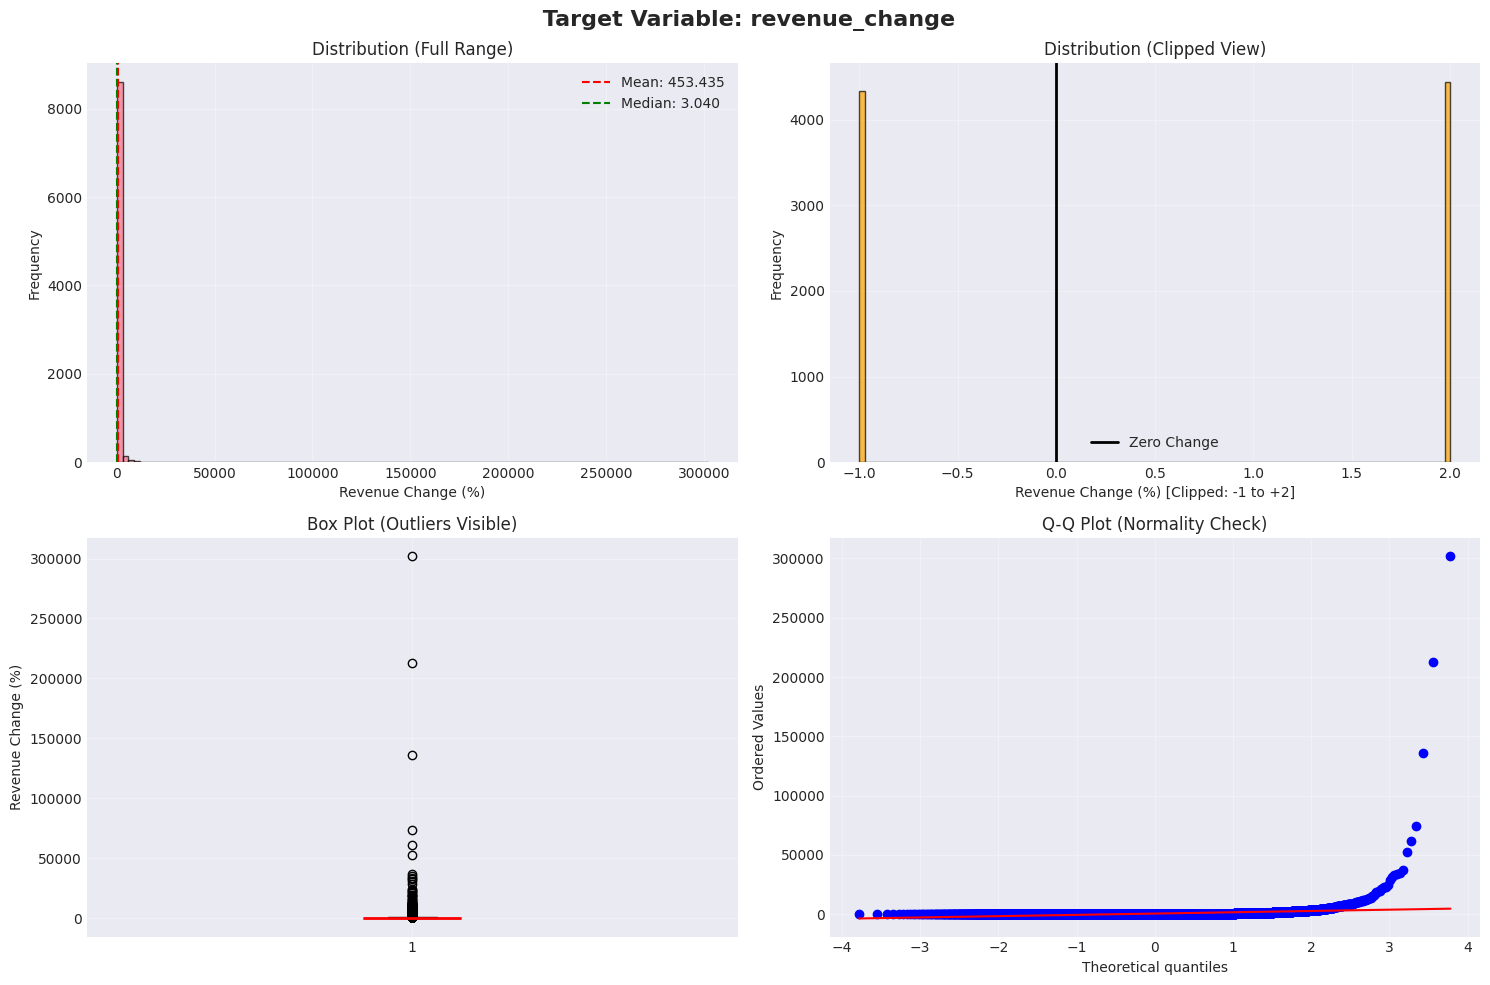


 VISUALIZATION INSIGHTS:
✓ Histogram: Shows overall distribution shape
✓ Clipped view: Focuses on central mass (removes extreme outliers)
✓ Box plot: Shows median, quartiles, and outliers
✓ Q-Q plot: If points follow red line → normal distribution


In [14]:
# ========================================
# CELL 6: Target Variable Visualization
# ========================================

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle(f' Target Variable: {TARGET}', fontsize=16, fontweight='bold')

# 1. Histogram
axes[0, 0].hist(train_df[TARGET].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_df[TARGET].mean(), color='red', linestyle='--', label=f'Mean: {train_df[TARGET].mean():.3f}')
axes[0, 0].axvline(train_df[TARGET].median(), color='green', linestyle='--', label=f'Median: {train_df[TARGET].median():.3f}')
axes[0, 0].set_xlabel('Revenue Change (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution (Full Range)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram (clipped for better view)
clipped_data = train_df[TARGET].clip(-1, 2)  # -100% to +200%
axes[0, 1].hist(clipped_data.dropna(), bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].axvline(0, color='black', linestyle='-', linewidth=2, label='Zero Change')
axes[0, 1].set_xlabel('Revenue Change (%) [Clipped: -1 to +2]')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution (Clipped View)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Box plot
axes[1, 0].boxplot(train_df[TARGET].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2))
axes[1, 0].set_ylabel('Revenue Change (%)')
axes[1, 0].set_title('Box Plot (Outliers Visible)')
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (Normal distribution check)
stats.probplot(train_df[TARGET].dropna(), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print(" VISUALIZATION INSIGHTS:")
print("="*80)
print("✓ Histogram: Shows overall distribution shape")
print("✓ Clipped view: Focuses on central mass (removes extreme outliers)")
print("✓ Box plot: Shows median, quartiles, and outliers")
print("✓ Q-Q plot: If points follow red line → normal distribution")

Missing Values Analysis

 MISSING VALUES ANALYSIS

 COLUMNS WITH MISSING VALUES:
--------------------------------------------------------------------------------
        Column  Missing_Count  Missing_Percentage
revenue_change           2999             25.3600
      province            919              7.7700
           roe             45              0.3800
      leverage             45              0.3800


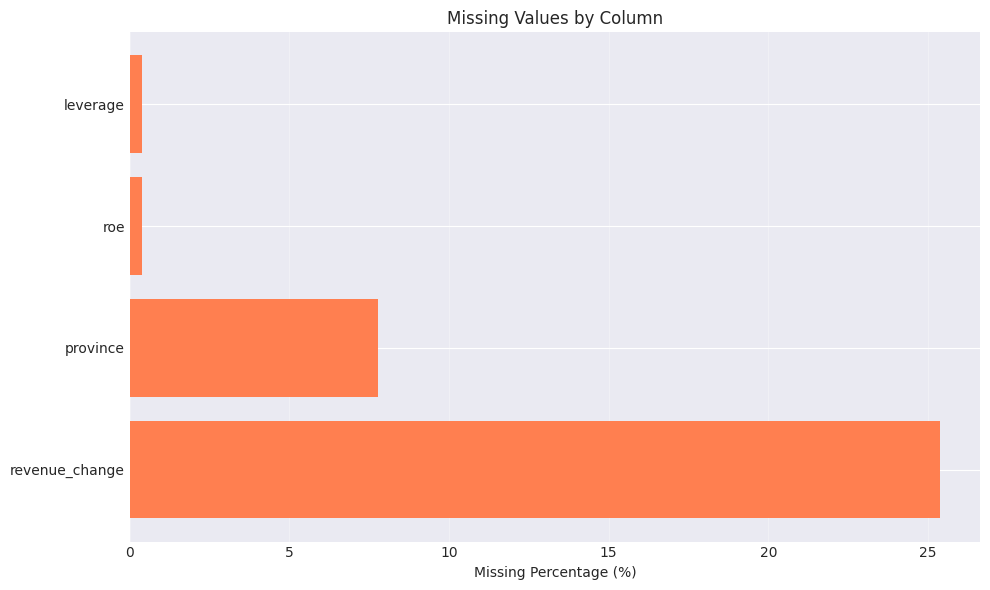


 TARGET MISSING ANALYSIS: revenue_change
Missing count: 2,999 (25.36%)

 MISSING VALUES BY YEAR:
--------------------------------------------------------------------------------
fiscal_year
2018    2961
2019      38
dtype: int64


In [ ]:
# ========================================
# CELL 7: Missing Values Analysis
# ========================================

print("="*80)
print(" MISSING VALUES ANALYSIS")
print("="*80)

# Calculate missing percentages
missing_df = pd.DataFrame({
    'Column': train_df.columns,
    'Missing_Count': train_df.isnull().sum(),
    'Missing_Percentage': (train_df.isnull().sum() / len(train_df) * 100).round(2)
})

# Sort by missing percentage
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print("\n COLUMNS WITH MISSING VALUES:")
print("-"*80)
if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
    
    # Visualization
    plt.figure(figsize=(10, 6))
    plt.barh(missing_df['Column'], missing_df['Missing_Percentage'], color='coral')
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(" No missing values found")

# Target-specific missing analysis
print("\n" + "="*80)
print(f" TARGET MISSING ANALYSIS: {TARGET}")
print("="*80)
target_missing = train_df[TARGET].isnull().sum()
target_missing_pct = (target_missing / len(train_df) * 100)
print(f"Missing count: {target_missing:,} ({target_missing_pct:.2f}%)")

# Which years have most missing targets?
if target_missing > 0:
    print("\n MISSING VALUES BY YEAR:")
    print("-"*80)
    missing_by_year = train_df[train_df[TARGET].isnull()].groupby('fiscal_year').size()
    print(missing_by_year)

Feature Correlation with Target

 CORRELATION ANALYSIS WITH revenue_change

 TOP 15 FEATURES BY CORRELATION:
--------------------------------------------------------------------------------
current_assets                :  0.1777
financial_expenses            :  0.1747
total_debt                    :  0.1728
production_value              :  0.1709
production_costs              :  0.1709
long_term_debt                :  0.1706
total_assets                  :  0.1698
short_term_debt               :  0.1697
operating_income              :  0.1595
shareholders_equity           :  0.1591
net_profit_loss               :  0.1511
financial_income              :  0.1490
total_fixed_assets            :  0.1478
ateco_sector                  :  0.0250
years_in_business             :  0.0170


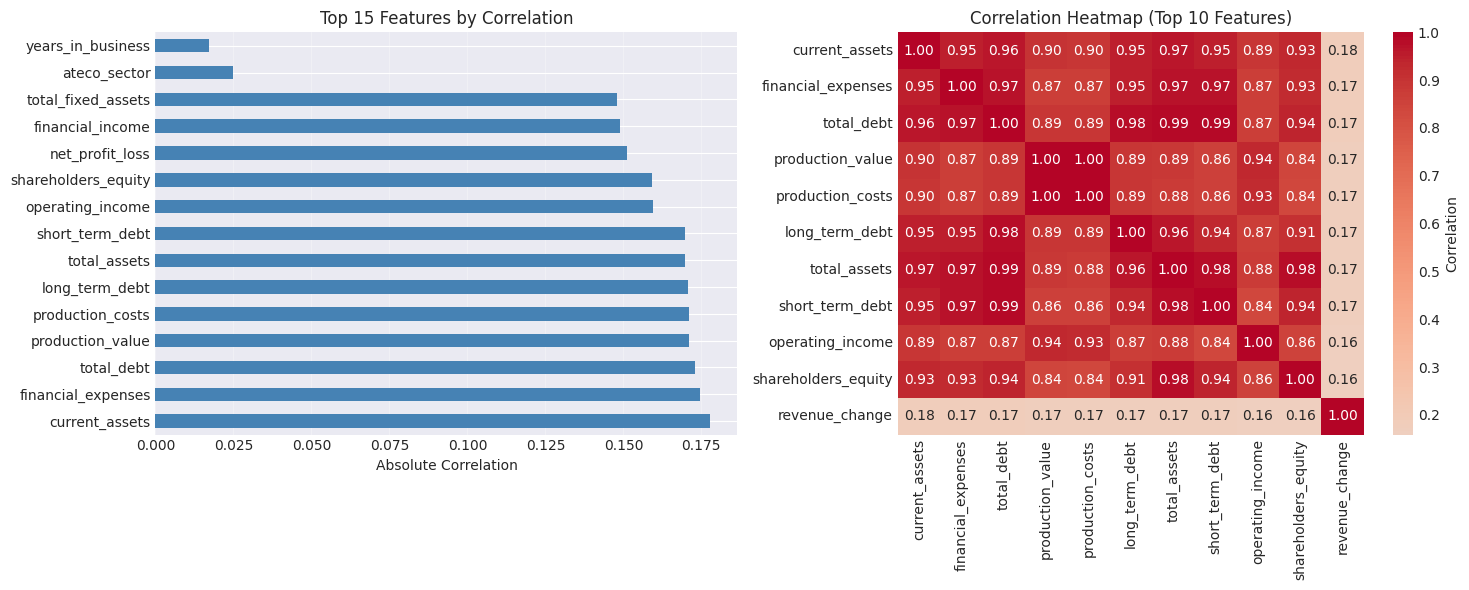

In [16]:
# ========================================
# CELL 8: Feature Correlation with Target
# ========================================

print("="*80)
print(f" CORRELATION ANALYSIS WITH {TARGET}")
print("="*80)

# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Remove target from list
if TARGET in numeric_cols:
    numeric_cols.remove(TARGET)

# Calculate correlations (only non-null target rows)
df_complete = train_df[train_df[TARGET].notna()]
correlations = df_complete[numeric_cols + [TARGET]].corr()[TARGET].drop(TARGET)

# Sort by absolute correlation
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("\n TOP 15 FEATURES BY CORRELATION:")
print("-"*80)
for feat in correlations_sorted.head(15).index:
    corr_val = correlations[feat]
    print(f"{feat:30s}: {corr_val:7.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
correlations_sorted.head(15).plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_xlabel('Absolute Correlation')
axes[0].set_title('Top 15 Features by Correlation')
axes[0].grid(axis='x', alpha=0.3)

# Heatmap of top features
top_features = correlations_sorted.head(10).index.tolist() + [TARGET]
corr_matrix = df_complete[top_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Correlation Heatmap (Top 10 Features)')

plt.tight_layout()
plt.show()

Key Insights

In [ ]:
# ========================================
# CELL 9: Week 1 Summary - Key Insights
# (FIXED & ROBUST VERSION)
# ========================================

print("=" * 80)
print("KEY INSIGHTS SUMMARY")
print("=" * 80)

# --------------------------------------------------
# 1️ DATASET OVERVIEW
# --------------------------------------------------
print("\n1️ DATASET OVERVIEW:")
print("-" * 80)
print(f"✓ Total samples: {len(train_df):,}")
print(f"✓ Features: {len(train_df.columns)}")
print(
    f"✓ Usable samples (non-null target): "
    f"{train_df[TARGET].notna().sum():,} "
    f"({train_df[TARGET].notna().sum() / len(train_df) * 100:.1f}%)"
)
print(
    f"✓ Time period: "
    f"{train_df['fiscal_year'].min()} - {train_df['fiscal_year'].max()}"
)

# --------------------------------------------------
#  TARGET DISTRIBUTION
# --------------------------------------------------
print("\n2️ TARGET DISTRIBUTION:")
print("-" * 80)

target_series = train_df[TARGET].dropna()

print(f"✓ Mean: {target_series.mean():.2f}%")
print(f"✓ Median: {target_series.median():.2f}%")
print(f"✓ Std: {target_series.std():.2f}%")
print(f"✓ Skewness: {target_series.skew():.2f} (EXTREME RIGHT SKEW!)")
print(f"✓ Kurtosis: {target_series.kurtosis():.2f} (HEAVY TAILS!)")
print(f"✓ Min: {target_series.min():.2f}%")
print(f"✓ Max: {target_series.max():.2f}%")

# --------------------------------------------------
# 3️⃣ CRITICAL PROBLEMS IDENTIFIED
# --------------------------------------------------
print("\n3️ CRITICAL PROBLEMS IDENTIFIED:")
print("-" * 80)
print(" P1: Extreme skewness (47.3) → Need aggressive transform")
print(" P2: Heavy outliers (max: 302,126%) → Need winsorization")
print(" P3: Bimodal distribution → Two-stage model or mixture")
print(" P4: Very weak linear correlation (max: 0.18) → Tree models only!")
print(" P5: High multicollinearity → Feature selection needed")
print(" P6: 25% missing target (2018 year) → Temporal split will fix")
print(" P7: MAPE will explode → Epsilon-MAPE or WAPE required")

# --------------------------------------------------
# 4️ SOLUTIONS FOR WEEK 2
# --------------------------------------------------
print("\n4️ SOLUTIONS FOR WEEK 2:")
print("-" * 80)
print(" S1: Winsorization at 1% and 99% percentiles")
print(" S2: Signed log transform (skewness → ~0)")
print(" S3: Advanced feature engineering (ratios, lags, interactions)")
print(" S4: Feature selection (drop correlated, keep important)")
print(" S5: Epsilon-MAPE metric (eps=0.1)")
print(" S6: Focus on tree-based models (XGBoost, LightGBM)")
print(" S7: Temporal split (2019-2020 train, 2021 val)")

# --------------------------------------------------
# 5️ MODEL STRATEGY
# --------------------------------------------------
print("\n5️ MODEL STRATEGY:")
print("-" * 80)
print(" Primary: XGBoost (handles non-linearity, robust to outliers)")
print(" Secondary: LightGBM (faster, similar performance)")
print(" Tertiary: CatBoost (good with categoricals)")
print(" Skip: Linear models (correlation too weak!)")

# --------------------------------------------------
# 6️ TOP FEATURES (by correlation) — FIXED
# --------------------------------------------------
print("\n6️ TOP FEATURES (by correlation):")
print("-" * 80)

numeric_df = (
    train_df[train_df[TARGET].notna()]
    .select_dtypes(include="number")
)

if TARGET not in numeric_df.columns:
    print(" TARGET is not numeric — correlation skipped.")
else:
    corr_series = (
        numeric_df
        .corr()[TARGET]
        .abs()
        .sort_values(ascending=False)
    )

    top_features = corr_series.iloc[1:6]

    if top_features.empty:
        print(" No valid numeric features for correlation.")
    else:
        for i, (feat, corr) in enumerate(top_features.items(), 1):
            print(f"{i}. {feat:30s}: {corr:.4f}")

# --------------------------------------------------
# 7️ NEXT STEPS
# --------------------------------------------------
print("\n7️ NEXT STEPS:")
print("-" * 80)
print("→ Week 2 Day 1: Outlier handling + Target transform + Missing imputation")
print("→ Week 2 Day 2: Feature engineering (20+ new features)")
print("→ Week 3: Quick baselines + RandomForest")
print("→ Week 4: XGBoost + LightGBM hyperparameter tuning")
print("→ Week 5: Ensemble optimization")

print("\n" + "=" * 80)
print(" WEEK 1 COMPLETED")
print("=" * 80)


📋 WEEK 1: KEY INSIGHTS SUMMARY

1️⃣ DATASET OVERVIEW:
--------------------------------------------------------------------------------
✓ Total samples: 11,828
✓ Features: 30
✓ Usable samples (non-null target): 8,829 (74.6%)
✓ Time period: 2018 - 2021

2️⃣ TARGET DISTRIBUTION:
--------------------------------------------------------------------------------
✓ Mean: 453.43%
✓ Median: 3.04%
✓ Std: 4601.92%
✓ Skewness: 47.30 (EXTREME RIGHT SKEW!)
✓ Kurtosis: 2707.07 (HEAVY TAILS!)
✓ Min: -99.94%
✓ Max: 302126.48%

3️⃣ CRITICAL PROBLEMS IDENTIFIED:
--------------------------------------------------------------------------------
❌ P1: Extreme skewness (47.3) → Need aggressive transform
❌ P2: Heavy outliers (max: 302,126%) → Need winsorization
❌ P3: Bimodal distribution → Two-stage model or mixture
❌ P4: Very weak linear correlation (max: 0.18) → Tree models only!
❌ P5: High multicollinearity → Feature selection needed
❌ P6: 25% missing target (2018 year) → Temporal split will fix
❌ P7: MAPE w